# Assignement E05 - DSIM

*Marco Donzella*

Implement an image classification neural network , following the guidelines shown during the laboratory.

Rules:

1. Classify both the MNIST and CIFAR10 datasets
2. Adhere to the following architecture:
- Explicit input layer
- Convolution (2D) with 32 3×3 filters
- ReLU
- Max pooling (2D) with a 2×2 filter
- Flattening
- Fully-connected mapping to 128 dimensions
- ReLU
- Fully-connected mapping to the final problem size

Submission:

1. Notebook with well-commented steps and observations on the results.
2. If you submit a .py script instead of a notebook, attach a short report for the observations on the results.
3. Name the submitted file as: E05_surname_name_studentID

## MNIST dataset

Nel seguente link vengono riportate tutte le informazioni relative al dataset *MNIST*: https://keras.io/api/datasets/mnist/.

*N.B.: assicurarsi di aver cambiato il tipo di runtime in GPU nelle impostazioni.*

In [1]:
# Runtime -> change runtime type -> GPU
from tensorflow import keras

In [2]:
import numpy as np
from skimage import io # Input/output
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

Viene caricato il dataset MNIST disponibile in keras:

In [25]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() # dataset

Viene aggiunta l'informazione riguardante il canale ai due dataset, così da poter lavorare con algoritmi già costruiti. Si procede poi con la trasformazione dei numeri da formato *int* a *float* (si divide per 255.0 così da ottenere numeri compresi tra 0 e 1).

In [26]:
x_train = np.expand_dims(x_train, axis=-1) # train
x_test = np.expand_dims(x_test, axis=-1) # test

In [27]:
x_train = x_train.astype('float32')/255.0 
x_test = x_test.astype('float32')/255.0

La variabile d'interesse *y* viene convertita e riscritta tramite la tipologia 'one-hot encoding', sia nel dataset di training che nel test set:

In [28]:
yc_train = keras.utils.to_categorical(y_train, 10) # vettore lungo 10
yc_test = keras.utils.to_categorical(y_test, 10)

Si procede ora con la costruzione del classificatore e la sua, successiva, ottimizzazione:

In [29]:
model = keras.Sequential()
model.add(keras.Input((28,28,1))) # input layer esplicito
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu')) # layer di convoluzione 2d con 32 filtri 3x3 + attivazione relu
model.add(keras.layers.MaxPooling2D(pool_size=(2,2))) # maxpooling 2d con filtro 2x2
model.add(keras.layers.Flatten()) # flattening
model.add(keras.layers.Dense(128, activation='relu')) # fully connected 128 neuroni (funzione di attivazione relu)
model.add(keras.layers.Dense(10, activation='softmax')) # fully connected che mappa alla soluzione del problema

In [30]:
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer = 'Adam', 
              metrics = ['accuracy'])

In [31]:
model.fit(x_train, yc_train, batch_size=128, epochs=10, verbose=1,
          validation_data=(x_test, yc_test))

Epoch 1/10
469/469 [==============================] - 5s 9ms/step - loss: 0.2179 - accuracy: 0.9382 - val_loss: 0.0935 - val_accuracy: 0.9702
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0693 - accuracy: 0.9801 - val_loss: 0.0545 - val_accuracy: 0.9824
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0466 - accuracy: 0.9859 - val_loss: 0.0510 - val_accuracy: 0.9838
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0346 - accuracy: 0.9896 - val_loss: 0.0469 - val_accuracy: 0.9841
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0254 - accuracy: 0.9926 - val_loss: 0.0427 - val_accuracy: 0.9860
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0190 - accuracy: 0.9942 - val_loss: 0.0484 - val_accuracy: 0.9852
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0146 - accuracy: 0.9956 - val_loss: 0.0463 - val_accuracy: 0.9851
Epoch 

Di seguito sono riportati migliori valori di accuracy e di loss ottenuti dal modello sul test set:

In [32]:
# Evaluation
score = model.evaluate(x_test, yc_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.049338385462760925
Test accuracy: 0.9848999977111816


In seguito viene applicato il modello per ottenere previsioni sul test set. Ad ogni record è stata assegnata la classe a cui era associato il valore di probabilità più elevato.

In [33]:
# Inference
yc_pred = model.predict(x_test)
# Selection of the highest-probability class for each test sample
y_pred = np.argmax(yc_pred, axis=1)

Classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.97      0.99      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Confusion matrix:
[[ 978    0    0    0    0    1    0    1    0    0]
 [   0 1128    2    1    0    0    2    1    1    0]
 [   2    2 1019    1    1    0    1    4    2    0]
 [   0    0    1 1000    0    5    0    3

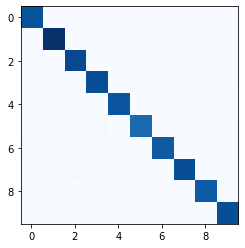

In [34]:
# Classification report
print('Classification report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
print('Confusion matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.imshow(cm, cmap=plt.cm.Blues)

Il modello risulta abbastanza efficiente nel classificare i dati; infatti è caratterizzato da un'accuracy pari a 0.74. La matrice di confusione, presentando alcuni valori al di fuori della diagonale principale, conferma quanto detto.

## CIFAR10 dataset

Nel seguente link vengono riportate tutte le informazione relative al dataset *CIFAR10*: https://keras.io/api/datasets/mnist/.

Di seguito vengono eseguite le stesse procedure descritte prima con il dataset *MNIST*.

In [35]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [36]:
x_train.shape # questa volta abbiamo elementi a colori

(50000, 32, 32, 3)

In questo dataset i record sono immagini a colori (quindi 1 dimensione in più rispetto a prima, ovvero quella riguardanti i 3 canali RGB). Non sarà dunque necessario aggiungere l'informazione canale in seguio, com'era stato fatto prima.

Viene riportato un esempio di record:

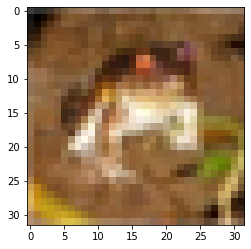

In [15]:
plt.imshow(x_train[0])

In [37]:
x_train = x_train.astype('float32')/255.0 
x_test = x_test.astype('float32')/255.0

In [38]:
yc_train = keras.utils.to_categorical(y_train, 10) 
yc_test = keras.utils.to_categorical(y_test, 10)

Viene costruita una rete neurale con la stessa struttura di prima (cambia solo la dimensione dell'input):

In [39]:
model = keras.Sequential()
model.add(keras.Input((32,32,3))) # input layer esplicito
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu')) # layer di convoluzione 2d con 32 filtri 3x3 + attivazione relu
model.add(keras.layers.MaxPooling2D(pool_size=2)) # maxpooling 2d con filtro 2x2
model.add(keras.layers.Flatten()) # flattening
model.add(keras.layers.Dense(128, activation='relu')) # fully connected 128 neuroni (funzione di attivazione sigmoide)
model.add(keras.layers.Dense(10, activation='softmax')) # fully connected che mappa alla soluzione del problema

In [40]:
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer = 'Adam', 
              metrics = ['accuracy'])

In [41]:
model.fit(x_train, yc_train, batch_size=128, epochs=10, verbose=1,
          validation_data=(x_test, yc_test))

Epoch 1/10
391/391 [==============================] - 5s 10ms/step - loss: 1.6388 - accuracy: 0.4081 - val_loss: 1.3831 - val_accuracy: 0.5060
Epoch 2/10
391/391 [==============================] - 4s 10ms/step - loss: 1.3205 - accuracy: 0.5362 - val_loss: 1.2771 - val_accuracy: 0.5488
Epoch 3/10
391/391 [==============================] - 4s 9ms/step - loss: 1.2089 - accuracy: 0.5766 - val_loss: 1.2275 - val_accuracy: 0.5670
Epoch 4/10
391/391 [==============================] - 4s 9ms/step - loss: 1.1414 - accuracy: 0.6023 - val_loss: 1.1504 - val_accuracy: 0.5968
Epoch 5/10
391/391 [==============================] - 4s 9ms/step - loss: 1.0807 - accuracy: 0.6205 - val_loss: 1.1325 - val_accuracy: 0.6036
Epoch 6/10
391/391 [==============================] - 4s 10ms/step - loss: 1.0312 - accuracy: 0.6407 - val_loss: 1.0989 - val_accuracy: 0.6117
Epoch 7/10
391/391 [==============================] - 4s 10ms/step - loss: 0.9891 - accuracy: 0.6548 - val_loss: 1.0651 - val_accuracy: 0.6322
Ep

In [42]:
# Evaluation
score = model.evaluate(x_test, yc_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.096992015838623
Test accuracy: 0.6144999861717224


In [43]:
# Inference
yc_pred = model.predict(x_test)
# Selection of the highest-probability class for each test sample
y_pred = np.argmax(yc_pred, axis=1)

Classification report:
              precision    recall  f1-score   support

           0       0.72      0.61      0.66      1000
           1       0.81      0.68      0.74      1000
           2       0.62      0.34      0.43      1000
           3       0.50      0.37      0.42      1000
           4       0.42      0.77      0.54      1000
           5       0.55      0.54      0.55      1000
           6       0.83      0.54      0.65      1000
           7       0.57      0.79      0.67      1000
           8       0.72      0.78      0.75      1000
           9       0.66      0.74      0.70      1000

    accuracy                           0.61     10000
   macro avg       0.64      0.61      0.61     10000
weighted avg       0.64      0.61      0.61     10000

Confusion matrix:
[[609  15  42  19  81   2   5  34 134  59]
 [ 31 679  12  10  16   7   4  16  48 177]
 [ 63   8 335  47 288  97  29  97  22  14]
 [ 16  11  33 368 202 197  31  94  22  26]
 [ 12   2  22  26 766  29  2

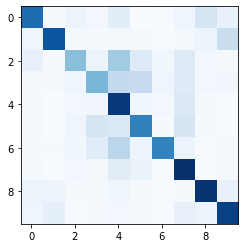

In [44]:
# Classification report
print('Classification report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
print('Confusion matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.imshow(cm, cmap=plt.cm.Blues)

É evidente che il modello non risulta efficiente come nel caso precedente; infatti in questo l'accuracy è pari a 0.61. 

Per ottenere risultati migliori sarà necessario arricchire/modificare la rete con ulteriori layer o aumentare il numero di epoche.